<a href="https://colab.research.google.com/github/Surabhi-Sunil/SurabhiSunil/blob/master/DBMS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/earthquake_1995-2023.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  284 non-null    object 
 18  country    651 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
df.shape

(1000, 20)

In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   title        1000 non-null   object        
 1   magnitude    1000 non-null   float64       
 2   date_time    1000 non-null   datetime64[ns]
 3   cdi          1000 non-null   int64         
 4   mmi          1000 non-null   int64         
 5   alert        449 non-null    object        
 6   Alert_Check  449 non-null    object        
 7   tsunami      1000 non-null   int64         
 8   sig          1000 non-null   int64         
 9   net          1000 non-null   object        
 10  nst          1000 non-null   int64         
 11  dmin         1000 non-null   float64       
 12  gap          1000 non-null   float64       
 13  magType      1000 non-null   object        
 14  depth        1000 non-null   float64       
 15  latitude     1000 non-null   float64       
 16  longitu

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [ ]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,Alert_Check,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,2023-08-16 12:47:00,7,4,green,False,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",NaN,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,2023-07-19 00:22:00,8,6,yellow,True,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,M 6.5 - 84 km NNW of San Antonio de los Cobres...,6.5,2023-03-22 16:00:00,4,4,green,False,0,656,us,97,1.622000,33.0,mww,209.976,-23.4797,-66.5108,"San Antonio de los Cobres, Argentina",South America,Argentina
3,"M 6.5 - 40 km SSE of Jurm, Afghanistan",6.5,2023-03-21 16:47:00,7,5,green,False,0,1350,us,134,2.530000,13.0,mww,187.589,36.5227,70.9787,"Jurm, Afghanistan",Asia,Afghanistan
4,M 7.3 - Alaska Peninsula,7.3,2023-07-16 06:48:00,0,5,NaN,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,NaN,NaN


In [ ]:
#feature engineering
new_dataFrame = df
new_dataFrame = new_dataFrame.drop(['net','magType','date_time','title','alert','location','country','continent'],axis=1, inplace=True)

KeyError: ignored

In [ ]:
new_dataFrame.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960


<Axes: >

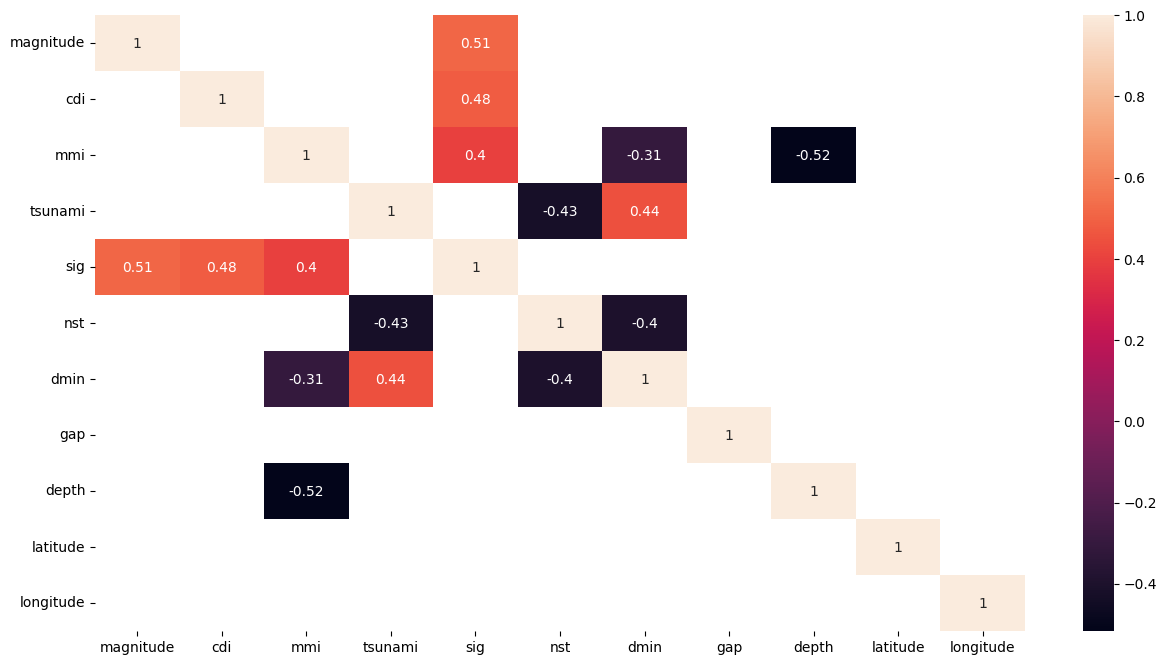

In [ ]:
d=new_dataFrame.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(15,8))
sns.heatmap(d,annot=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB

In [ ]:
sc = StandardScaler()

x=new_dataFrame.drop('tsunami',axis=1)
y=new_dataFrame['tsunami']
scale_x=sc.fit_transform(x)
x=pd.DataFrame(scale_x,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
x_train1,x_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

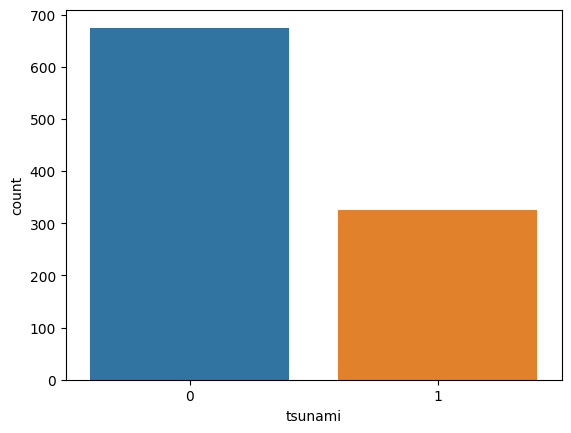

In [ ]:
sns.countplot(x=y, data=new_dataFrame)

In [ ]:
#undersample so that the balance in the dataset can be obtained
from collections import Counter
undersample = RandomUnderSampler(sampling_strategy=1)
# transform the dataset
print(Counter(y_train))
x_train, y_train = undersample.fit_resample(x_train, y_train)
print(Counter(y_train))

Counter({0: 605, 1: 295})
Counter({0: 295, 1: 295})


In [ ]:
#oversample the data so that balance is maintained
sm=SMOTE()
print(Counter(y_train1))
x_train1,y_train1=sm.fit_resample(x_train1,y_train1)
print(Counter(y_train1))

Counter({0: 528, 1: 272})
Counter({0: 528, 1: 528})


In [ ]:
models = {
    "Logistic regression":LogisticRegression(),
    "Decision Tree ":DecisionTreeClassifier(),
    "RandomForest":RandomForestClassifier(),
    "xgb":xgb.XGBClassifier(),
    "Naive Bayes": GaussianNB(),
}

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split, KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

for name,model in models.items():
    model.fit(x_train,y_train)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    trainResult = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=kfold)
    print("Training accuracy:",trainResult.mean())
    testResult = metrics.accuracy_score(y_test, p)
    print("Testing accuracy:",testResult.mean())
    print("**********************************************************")

Model:  Logistic regression
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       207
           1       0.73      0.86      0.79        93

    accuracy                           0.86       300
   macro avg       0.83      0.86      0.84       300
weighted avg       0.87      0.86      0.86       300

Training accuracy: 0.8232192414431083
Testing accuracy: 0.86
**********************************************************
Model:  Decision Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       207
           1       0.75      0.81      0.78        93

    accuracy                           0.86       300
   macro avg       0.83      0.84      0.84       300
weighted avg       0.86      0.86      0.86       300

Training accuracy: 0.833950046253469
Testing accuracy: 0.8566666666666667
***************************************

In [ ]:
for name,model in models.items():
    model.fit(x_train1,y_train1)
    p1 = model.predict(x_test1)
    print("Model: " , name)
    print(classification_report(y_test1,p))
    trainResult = cross_val_score(model, x_train1, y_train1, scoring='accuracy', cv=kfold)
    print("Training accuracy:",trainResult.mean())
    testResult = metrics.accuracy_score(y_test1, p)
    print("Testing accuracy:",testResult.mean())
    print("**********************************************************")

Model:  Logistic regression
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       145
           1       0.28      0.40      0.33        55

    accuracy                           0.56       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.61      0.56      0.57       200

Training accuracy: 0.8613207547169811
Testing accuracy: 0.555
**********************************************************
Model:  Decision Tree 
              precision    recall  f1-score   support

           0       0.73      0.61      0.67       145
           1       0.28      0.40      0.33        55

    accuracy                           0.56       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.61      0.56      0.57       200

Training accuracy: 0.8981132075471697
Testing accuracy: 0.555
**********************************************************
Model:  RandomForest
              precision    recal

In [ ]:
#random forest performs consistenly in both scenarios. So this can be considered.

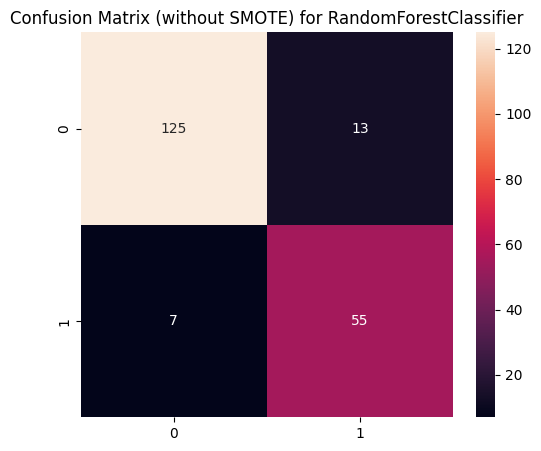

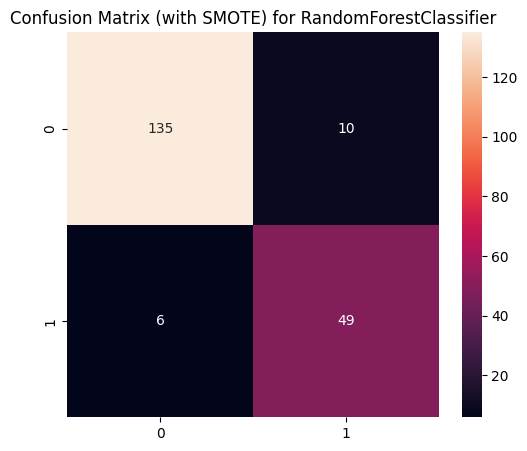

In [ ]:
# Without SMOTE
model = xgb.XGBClassifier()
model.fit(x_train,y_train)
p = model.predict(x_test)
# Confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, p), annot=True, fmt='d')
plt.title('Confusion Matrix (without SMOTE) for RandomForestClassifier')
plt.show()

# With SMOTE
model.fit(x_train1,y_train1)
p1 = model.predict(x_test1)
# Confusion matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test1, p1), annot=True, fmt='d')
plt.title('Confusion Matrix (with SMOTE) for RandomForestClassifier')
plt.show()
